In [128]:
import cv2
from matplotlib import pyplot as plt

In [129]:
def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

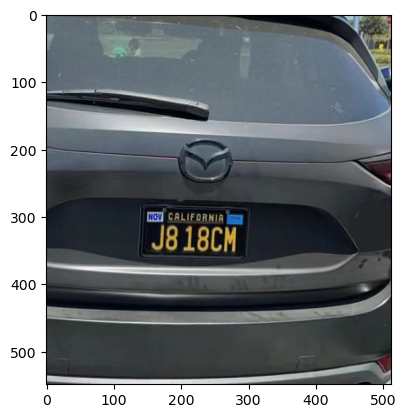

In [130]:
from skimage.io import imread
rawimage = imread('C:/Users/dick/920.jpg')
plt_show(rawimage)

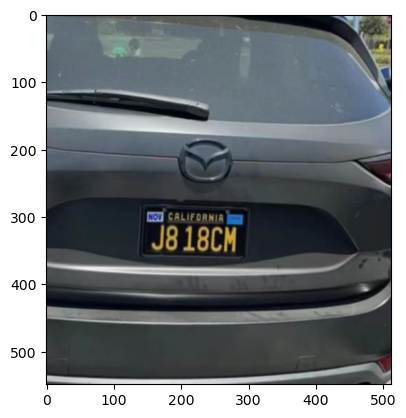

In [131]:
image = cv2.GaussianBlur(rawimage,(3,3),0)
plt_show(image)

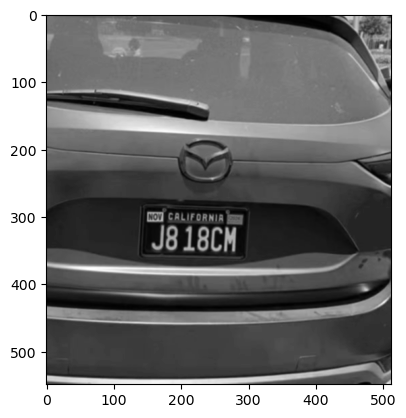

In [132]:
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

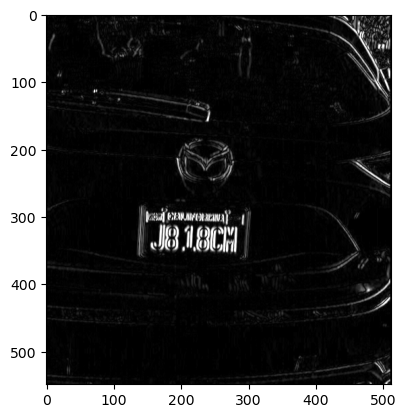

In [134]:
Sobel_x = cv2.Sobel(gray_image, cv2.CV_16S,1,0)
absX = cv2.convertScaleAbs(Sobel_x)
image = absX
plt_show(image)

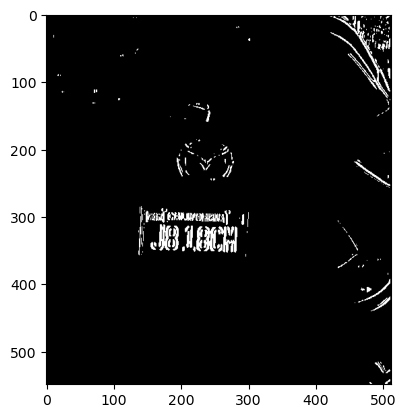

In [135]:
ret, image = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plt_show(image)

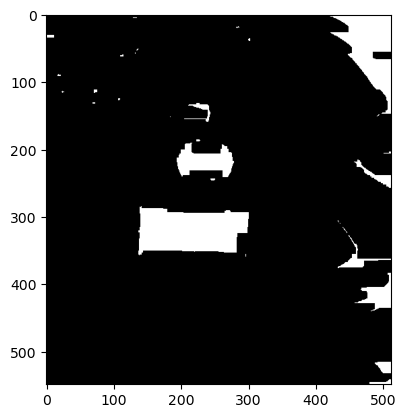

In [136]:
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT,(17,5))
image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernelX,iterations =2)
plt_show(image)

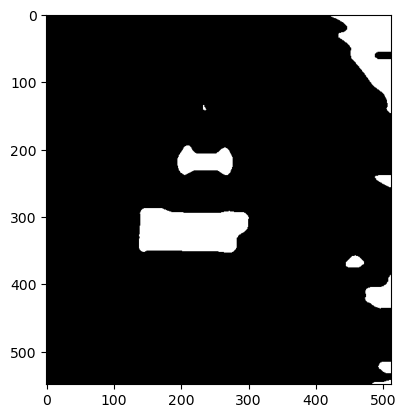

In [137]:
image = cv2.medianBlur(image,15)
plt_show(image)

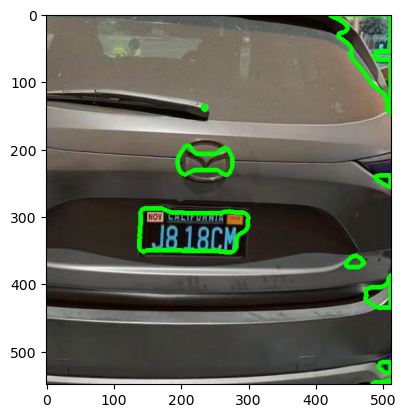

In [138]:
contours, hierarchy = cv2.findContours(image , cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
image1 = rawimage.copy()
cv2.drawContours(image1,contours, -1,(0,255,0),5)
plt_show0(image1)

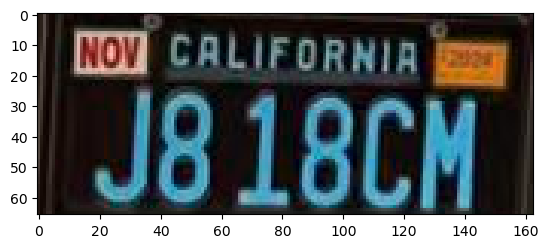

In [139]:
for item in contours:
    rect = cv2.boundingRect(item)
    x = rect[0]
    y = rect[1]
    width = rect[2]
    height = rect[3]
    if (width >(height * 2)) and (width < (height * 3)):
        image = rawimage[y:y + height, x:x + width]
        plt_show0(image)
        cv2.imwrite('C:/Users/dick/test3.jpg',image)

In [140]:
from skimage.io import imread
import easyocr
from PIL import Image, ImageDraw, ImageFont
import numpy as np

In [141]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [142]:
result = reader.readtext('test3.jpg')
result

[([[9, 3], [129, 3], [129, 23], [9, 23]],
  'mo california',
  0.17756469291660157),
 ([[12, 20], [154, 20], [154, 66], [12, 66]], 'J8 18CM', 0.9963558620128717)]

In [143]:
result1 = reader.readtext('test3.jpg',detail = 0)
text = result1[1]
text

'J8 18CM'

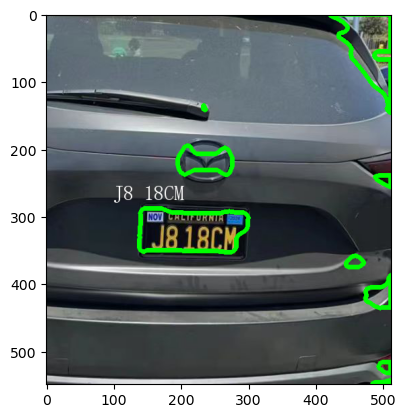

In [144]:
imgPIL = Image.fromarray(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

drawPIL = ImageDraw.Draw(imgPIL)
textSize = 30
fontText = ImageFont.truetype("font/simsun.ttc", textSize, encoding="utf-8")
pos = (100,250)  # (left, top)，字符串左上角坐标
text = text
color = (255, 255, 255)  # white
drawPIL.text(pos, text, color, font=fontText)

imgPutText = cv2.cvtColor(np.asarray(imgPIL), cv2.COLOR_RGB2BGR)
plt.imshow(imgPutText)
plt.show()